# Image Classification using Transfer Learning

InceptionResNetV2 model
https://keras.io/api/

In [1]:
import numpy as np 
from PIL import Image #image operasyonları için 
from IPython.display import Image as show_image  #image göstermek için
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_resnet_v2 import preprocess_input, decode_predictions


2023-12-27 15:36:22.306434: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-27 15:36:23.741907: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


InceptionResNetV2 önceden trainlenmiş modeli 299x299 çözünürlükte inputs bekler

bu modelin 1000 tahmin katogerisi vardır

In [2]:
# yüklediğimiz görüntümüzü istenen 299x299 boyutua çevirmeliyiz
img = Image.open("toy.jpg").resize((299,299))

In [3]:
#operasyonlarımızı yapabilmemiz için numpy arrayine çevirmemiz gerek
img = np.array(img)

In [4]:
img.shape

(299, 299, 3)

In [5]:
print(img.ndim)  #kaç boyutlu olduğuna bakıyoruz

3


In [6]:
# arrayimize extra boyut eklememiz gerek

img = img.reshape(-1, 299, 299, 3) # -1 boyut ekleme işlemidir

In [7]:
img.shape

(1, 299, 299, 3)

In [8]:
print(img.ndim)

4


In [9]:
#preprocess_input fonksiyonu, InceptionResNetV2 modeline uygun giriş şekline getirmek için kullanılır. 
img = preprocess_input(img)

In [10]:
incresv2_model = InceptionResNetV2(weights='imagenet', classes=1000)
#InceptionResNetV2 modelini oluştururken, weights parametresine 'imagenet' değerini geçirerek, modeli ImageNet veri kümesi üzerinde eğitilmiş ağırlıklarla yüklemiş olursunuz. 
#Ayrıca, classes parametresini belirtmenize gerek yoktur, çünkü bu parametre genellikle ImageNet veri kümesindeki sınıf sayısını belirlemek için kullanılır ve InceptionResNetV2 modeli zaten 1000 sınıf için eğitilmiştir.

2023-12-27 15:36:26.400081: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-27 15:36:26.554539: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [11]:
#layer
print(incresv2_model.summary())
print(type(incresv2_model))

Model: "inception_resnet_v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                               

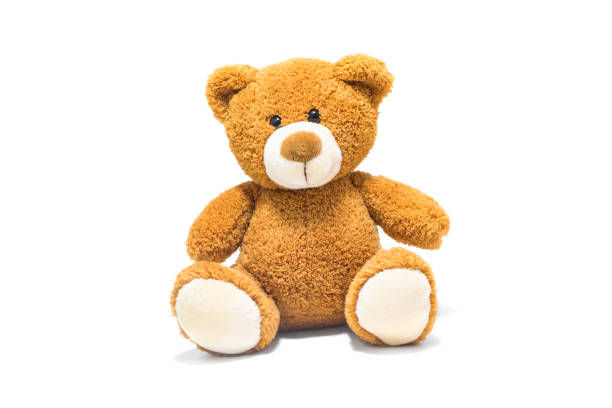

In [12]:
show_image(filename='toy.jpg')

In [15]:
preds = incresv2_model.predict(img)
print('Predict categories: ', decode_predictions(preds, top=2)[0]) #sonuçlar tuple halinde olur
# [0] indeksi kullanılarak, sadece "en yüksek" 2 olasılığa sahip olan sınıfın bilgilerine erişilmiştir.

1/1 [==============================] - 0s 222ms/step
Predict categories:  [('n04399382', 'teddy', 0.9879659), ('n04462240', 'toyshop', 0.0008450149)]
